# Py: K-means clustering of COVID dataset

**This notebook was originally created by Amanda Aitken for the Data Analytics Applications subject, as *Exercise 6.4 - K-means clustering of COVID dataset*, in the *DAA M06 Unsupervised learning* module.**

**Data Analytics Applications is a Fellowship Applications (Module 3) subject with the Actuaries Institute that aims to teach students how to apply a range of data analytics skills, such as neural networks, natural language processing, unsupervised learning and optimisation techniques, together with their professional judgement, to solve a variety of complex and challenging business problems. The business problems used as examples in this subject are drawn from a wide range of industries.**

**Find out more about the course [here](https://www.actuaries.asn.au/education-program/fellowship/subjects-and-syllabus/data-analytics-applications-subject).**


## Purpose
The following code performs K-means clustering on COVID data.
Once you have read through the code, run it and inspected the output, you should try using different values of K and observe the differences in the clustering outcomes.

## References
The dataset that is used in this exercise was sourced from Our World in Data at https://ourworldindata.org/covid-cases.

This dataset was downloaded from the above link on 31 March 2021. It contains country-by-country data on confirmed coronavirus disease (COVID-19) cases and at the time of writing is updated on a daily basis.

The data contains COVID-19 and population related features for over 100 countries. These features include:
- total cases per million people;
- total new cases per million people;
- total deaths per million people;
- new deaths per million people;
- reproduction rate of the disease;
- positive testing rate;
- total tests per thousand people;
- icu patients per million people; and
- hospital patients per million people.

## Packages
This section installs packages that will be required for this exercise/case study.

In [1]:
import pandas as pd # Used for data management.

import matplotlib.pyplot as plt
%matplotlib inline 

# The following scikit-learn libraries will be used
# to standardise the features and run K-means clustering.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## Data
This section:
- imports the data that will be used in the modelling;
- explores the data; and
- prepares the data for modelling.

### Import data


In [2]:
# Note that the following code could be used to read the most
# recent data in directly from the Our World in Data website:

# covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# However, we will use a snapshot so that the notebook keeps working even if the dataset format changes.

In [3]:
# Create a dataset called 'covid'.
covid = pd.read_csv('https://actuariesinstitute.github.io/cookbook/_static/daa_datasets/DAA_M06_COVID_data.csv.zip', header = 0)

### Prepare data


In [4]:
# Restrict the data to only look at one point in time (31-Dec-2020)
covid2 = covid[covid['date']=='2020-12-31']

# This analysis will use nine features in the clustering.
# The column 'location' is also retained to give us the country names.
# Countries that have missing values at the extract date are dropped from
# the data table using the .dropna() method.
covid3 = covid2[['location','total_cases_per_million','new_cases_per_million',
                   'total_deaths_per_million','new_deaths_per_million',
                   'reproduction_rate','positive_rate','total_tests_per_thousand',
                 'icu_patients_per_million','hosp_patients_per_million']].dropna()

covid_data = covid3.drop(columns='location')
print(covid_data.info())

countries = covid3['location'].tolist()
print(countries)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4823 to 74527
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_cases_per_million    17 non-null     float64
 1   new_cases_per_million      17 non-null     float64
 2   total_deaths_per_million   17 non-null     float64
 3   new_deaths_per_million     17 non-null     float64
 4   reproduction_rate          17 non-null     float64
 5   positive_rate              17 non-null     float64
 6   total_tests_per_thousand   17 non-null     float64
 7   icu_patients_per_million   17 non-null     float64
 8   hosp_patients_per_million  17 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB
None
['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Portugal', 'Slovenia', 'Spain', 'United Kingdom', 'United States']


## Modelling

### Fit model

This section performs K-means clustering.

In [5]:
# Perform K-means clustering on the COVID data.

# Create a scaler so that the features in the dataset can be
# scaled to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

# Create a KMeans model with k clusters.
# You can experiment with different values of k here.
k = 3
kmeans = KMeans(n_clusters=k)

# Create a pipeline to link together the scaler and kmeans instance.
pipeline = make_pipeline(scaler,kmeans)

# Build a K-means clustering model by fitting the pipeline to the COVID dataset.
pipeline.fit(covid_data)

# Predict the cluster labels for the COVID dataset.
labels = pipeline.predict(covid_data)

# Create a DataFrame, df, aligning labels and countries.
df = pd.DataFrame({'labels': labels, 'countries': countries})

# Display df sorted by cluster label.
print(df.sort_values(by='labels'))

    labels       countries
11       0      Luxembourg
0        1         Austria
14       1           Spain
13       1        Slovenia
12       1        Portugal
10       1           Italy
15       1  United Kingdom
16       1   United States
2        1        Bulgaria
1        1         Belgium
6        2         Estonia
9        2          Israel
5        2         Denmark
4        2          Cyprus
3        2          Canada
7        2         Finland
8        2         Ireland


## Plot elbow curve
One method of selecting an appropriate value for K is to plot a graph of the within-cluster sum of squares, 𝑊𝐶𝑆𝑆 or *inertia*, for different values of K.

Elbow curves are described in Module 6.

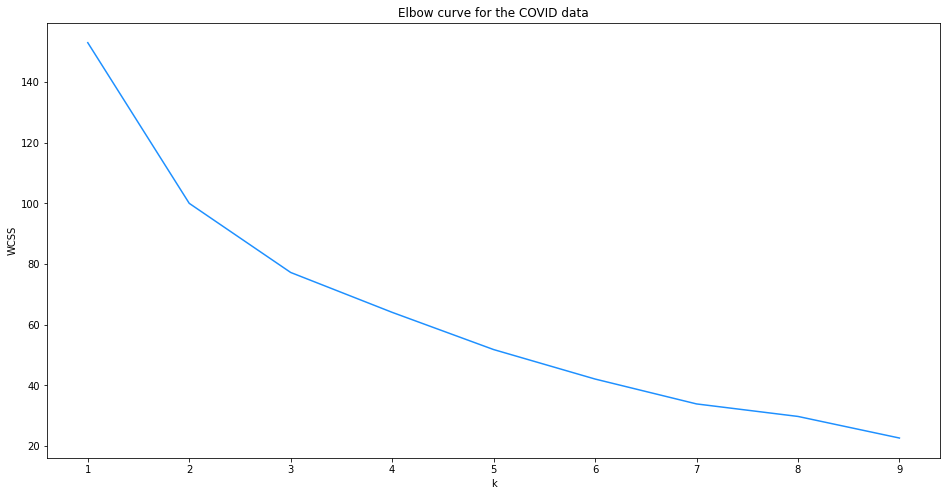

In [6]:
# Calculate the WCSS or inertia for different values of K.
WCSS = []
K = range(1,10)
for k in K:
    kmeans2 = KMeans(n_clusters=k)
    pipeline2 = make_pipeline(scaler,kmeans2)
    pipeline2.fit(covid_data)
    WCSS.append(kmeans2.inertia_)

# Plot the elbow curve. ('bx-')
plt.figure(figsize=(16,8))
plt.plot(K, WCSS,color='dodgerblue')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow curve for the COVID data')
plt.show()

The elbow curve suggests that a selection of K = 2 might be appropriate for this data as there is a kink in the curve at this point. However, you could also argue that a selection of K = 4 might be more appropriate because it results in a lower within cluster sum of squares (WCSS) and there is also a slight kink in the plot at this point.